# Benchmark Results Visualization

## Text models Performance, depending on Conversation Length

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# reading logs data

class Results:
    
    def __init__(self, train_log_url, eval_log_url):

        # importing train log data
        with open(train_log_url) as f:
            lines = f.readlines()
            self.optimizer = lines[0]
            self.batch_size = int(lines[2])
            self.conv_length = int(lines[4])
            self.train_accuracy = float(lines[6])
            self.train_f1_weighted = float(lines[8])
            self.val_accuracy = float(lines[10])
            self.val_f1_weighted = float(lines[12])
            self.train_time = float(lines[14])

        # importing evalusation data
        with open(eval_log_url) as f:
            lines = f.readlines()
            self.val_f1_all = np.array(lines[1].replace('[','').replace(']','').split()).astype(float) 
            self.val_f1_macro = float(lines[3].strip())
            self.val_f1_weighted = float(lines[5].strip())
            self.test_f1_all = np.array(lines[7].replace('[','').replace(']','').split()).astype(float)
            self.test_f1_macro = float(lines[9].strip())
            self.test_f1_weighted = float(lines[11].strip())
            self.test_prediction_time = float(lines[13].strip())
    
    def __str__(self):
        return str(vars(res))


albert_results = [Results(train_log_url = f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42.txt',
    eval_log_url=f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42_results.txt') for i in range(1,5)]

text_bilstm_results = [Results(train_log_url = f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42.txt',
    eval_log_url=f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42_results.txt') for i in range(1,5)]

### F1

[0.39564787 0.37098446 0.3640553  0.41035857 0.1594533  0.34397163]
[0.43052838 0.34545455 0.43824701 0.50474383 0.15897436 0.49431818]


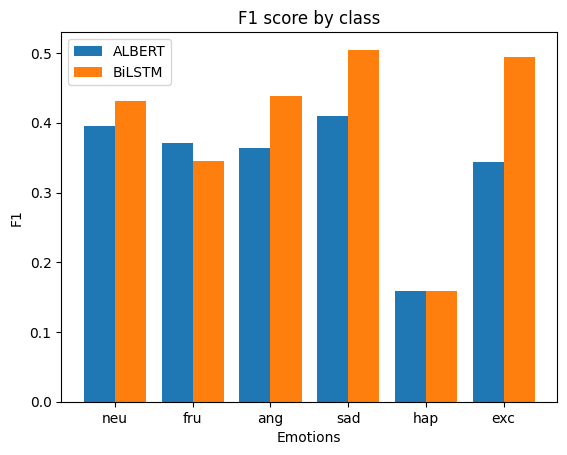

In [25]:
## f1 values by class
# are these the ones we are considering?
label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']
albert_f1_byclass = albert_results[3].test_f1_all[:6]
text_bilstm_f1_byclass = text_bilstm_results[3].test_f1_all[:6] 

print(albert_f1_byclass)
print(text_bilstm_f1_byclass)

  
X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.2, albert_f1_byclass, 0.4, label = 'ALBERT')
plt.bar(X_axis + 0.2, text_bilstm_f1_byclass, 0.4, label = 'BiLSTM')
  
plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title("F1 score by class")
plt.legend()
plt.show()

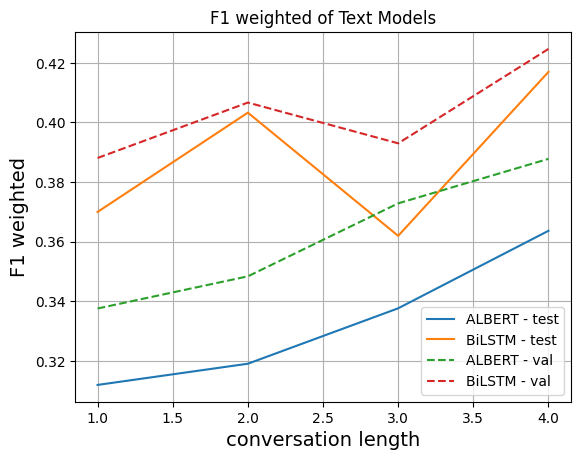

In [5]:
albert_f1_weighted_test = [i.test_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_test = [i.test_f1_weighted for i in text_bilstm_results]
albert_f1_weighted_val = [i.val_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_val = [i.val_f1_weighted for i in text_bilstm_results]
albert_convlen = [i.conv_length for i in albert_results]

## F1 weighted depending on conversation length
plt.plot(albert_convlen, albert_f1_weighted_test, label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_weighted_test , label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_weighted_val, linestyle='--', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_weighted_val, linestyle='--', label='BiLSTM - val')
plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend()
plt.show()


### Accuracy

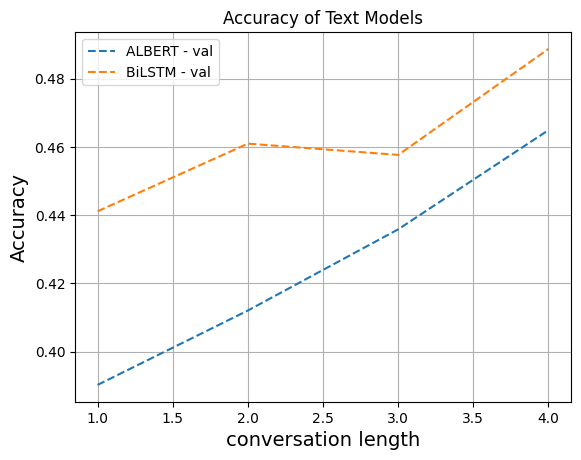

In [6]:
#albert_results_accuracy_test = [i.test_accuracy for i in albert_results]
#text_bilstm_results_accuracy_test = [i.test_accuracy for i in text_bilstm_results]
albert_accuracy_val = [i.val_accuracy for i in albert_results]
text_bilstm_accuracy_val = [i.val_accuracy for i in text_bilstm_results]
albert_results_convlen = [i.conv_length for i in albert_results]


## accuracy depending on conversation length
#plt.plot(albert_results_convlen, albert_results_accuracy_test, label='ALBERT - test')
#plt.plot(albert_results_convlen, text_bilstm_results_accuracy_test , label='BiLSTM - test')
plt.plot(albert_results_convlen, albert_accuracy_val, linestyle='--', label='ALBERT - val')
plt.plot(albert_results_convlen, text_bilstm_accuracy_val, linestyle='--', label='BiLSTM - val')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Accuracy of Text Models')
plt.grid()
plt.legend()
plt.show()


### Training Time

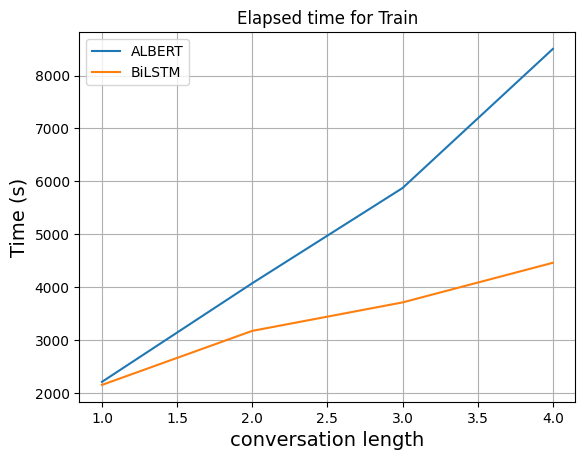

In [8]:
# train time
albert_train_time = [i.train_time for i in albert_results]
text_bilstm_train_time = [i.train_time for i in text_bilstm_results]

# prediction time
albert_eval_time = [i.test_prediction_time for i in albert_results]
text_bilstm_eval_time = [i.test_prediction_time for i in text_bilstm_results]

albert_results_convlen = [i.conv_length for i in albert_results]

## Elapsed time (s) depending on conversation length

plt.plot(albert_results_convlen, albert_train_time, label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_train_time, label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()


### Inference Time

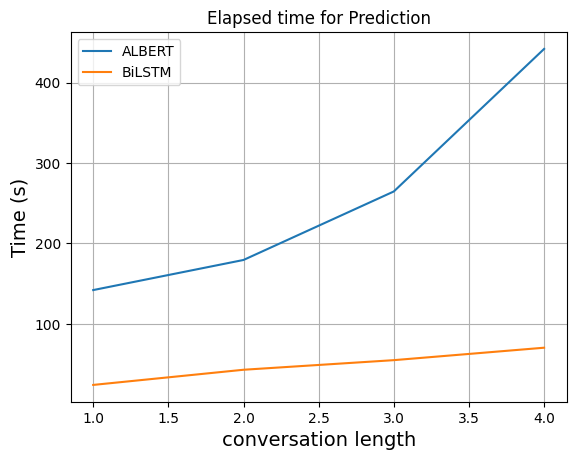

In [10]:
plt.plot(albert_results_convlen, albert_eval_time, label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_eval_time, label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

## Audio models Performance, depending on Conversation Length

In [ ]:
## barplot con f1 per classe

### Accuracy

### Training Time

### Inference Time

### Wav2Vec Performance, depending on quantile